In [3]:
# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# File to load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the city and ride data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(city_df, ride_df, on="city", how="outer")

In [5]:
# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
# Info
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
driver_count    2375 non-null int64
type            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


## Bubble Plot of Ride Sharing Data

In [7]:
urban = combined_data.loc[(combined_data['type'] == 'Urban')]
suburban = combined_data.loc[(combined_data['type'] == 'Suburban')]
rural = combined_data.loc[(combined_data['type'] == 'Rural')]

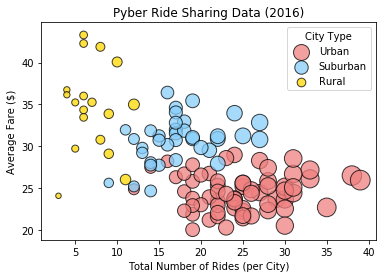

In [8]:
# Obtain the x and y coordinates for each of the three city types
average_fare_urban = urban.groupby(['city'])['fare'].mean()
total_rides_urban = urban.groupby(['city']).count()['ride_id']
total_drivers_urban = urban.groupby(['city'])['driver_count'].value_counts()

average_fare_suburban = suburban.groupby(['city'])['fare'].mean()
total_rides_suburban = suburban.groupby(['city']).count()['ride_id']
total_drivers_suburban = suburban.groupby(['city'])['driver_count'].value_counts()

average_fare_rural = rural.groupby(['city'])['fare'].mean()
total_rides_rural = rural.groupby(['city']).count()['ride_id']
total_drivers_rural = rural.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types
plt.scatter(total_rides_urban, average_fare_urban, s=10*total_drivers_urban, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75, label="Urban")
plt.scatter(total_rides_suburban, average_fare_suburban, s=10*total_drivers_suburban, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75, label="Suburban")
plt.scatter(total_rides_rural, average_fare_rural, s=10*total_drivers_rural, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label="Rural")

# Create a legend
plt.legend(loc=1, title='City Type')

# Incorporate a text label regarding circle size
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')

# Save figure
plt.savefig('images/BubblePlot.png')

In [9]:
# Show plot
plt.show()

## Total Fares by City Type

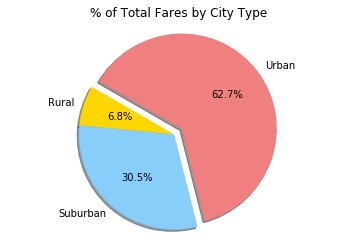

In [10]:
# Calculate type percents
total_fares = combined_data.groupby(['type'])['fare'].sum()

# Build pie chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(total_fares, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.axis('equal')

# Save figure
plt.savefig('images/TotalFares.png')

In [83]:
# Show Figure
plt.show()

## Total Rides by City Type

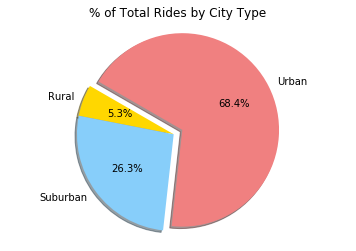

In [84]:
# Calculate Ride Percents
total_rides = combined_data.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(total_rides, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.axis('equal')

# Save Figure
plt.savefig('TotalRides.png')

In [85]:
# Show Figure
plt.show()

## Total Drivers by City Type

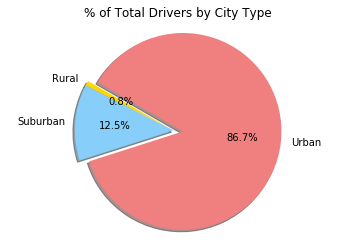

In [86]:
# Calculate Driver Percents
total_drivers = combined_data.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(total_drivers, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.axis('equal')

# Save Figure
plt.savefig('TotalDrivers.png')

In [87]:
# Show Figure
plt.show()